In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

In [2]:
def load_xvg_file(filename):
    x, y = [], []
    with open(filename) as f:
        for line in f:
            cols = line.split()
            if len(cols)==2:
                x.append(cols[0])
                y.append(cols[1])
    return np.array(x[1:],dtype=float),np.array(y[1:],dtype=float) #skip the first value (header)

In [3]:
dt= 0.1 # output every 1ps
path = '../data/'

### NVT

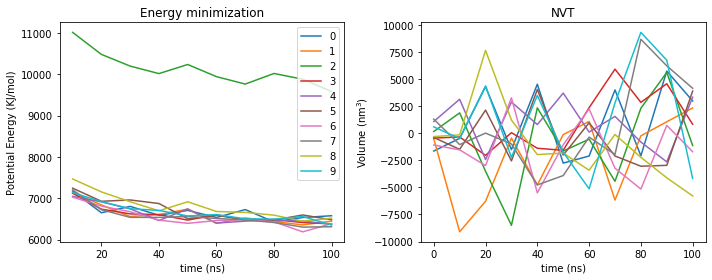

In [4]:
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
for r in range(10):
    filename = "R%d/nvt_potential.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x[1:]*dt,y[1:],lw=1.5,label=r)
plt.ylabel('Potential Energy (KJ/mol)')
plt.xlabel('time (ns)')
plt.legend()

plt.title('Energy minimization')

plt.subplot(1,2,2)
for r in range(10):
    filename = "R%d/nvt_volume.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x[:]*dt,y[:],lw=1.5,label=r)
    #plt.axhline(y=y[-1],ls='--',color='grey')
plt.ylabel(r'Volume (nm$^3$)')
plt.xlabel('time (ns)')
#plt.ylim(590,610)
#plt.xlim(18,20)
#plt.axhline(y=y[-1],ls='--',color='green')
plt.title('NVT')

plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)
plt.show()

### NPT

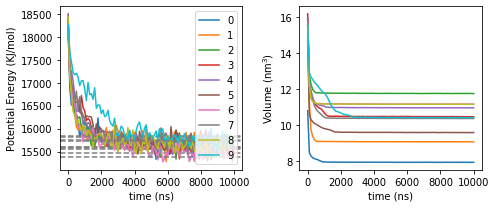

In [5]:
plt.figure(figsize=[7,3])

plt.subplot(1,2,1)
for r in range(10):
    filename = "R%d/npt_potential.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x[:]*dt,y[:],lw=1.5,label=r)
    plt.axhline(y=y[-1],ls='--',color='gray')
plt.ylabel('Potential Energy (KJ/mol)')
plt.xlabel('time (ns)')
plt.legend()


plt.subplot(1,2,2)
for r in range(10):
    filename = "R%d/npt_volume.xvg"%r
    x,y = load_xvg_file(path+filename)
    plt.plot(x*dt,y,lw=1.5,label=r)
    #plt.axhline(y=y[-1],ls='--',color='gray')
plt.ylabel(r'Volume (nm$^3$)')
plt.xlabel('time (ns)')
#plt.ylim(8.155,8.175)
#plt.xlim(98,100)

plt.tight_layout()
plt.savefig('/Users/fivos/Desktop/fig.png',dpi=300)
plt.show()